In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Define paths to the dataset
train_dir = 'drive/MyDrive/Dataset_2/TrainDataset'
val_dir = 'drive/MyDrive/Dataset_2/TrainDataset'

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Create data generators for the training and validation sets
train_datagen = ImageDataGenerator(
     rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,              
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')


Found 259 images belonging to 2 classes.
Found 259 images belonging to 2 classes.


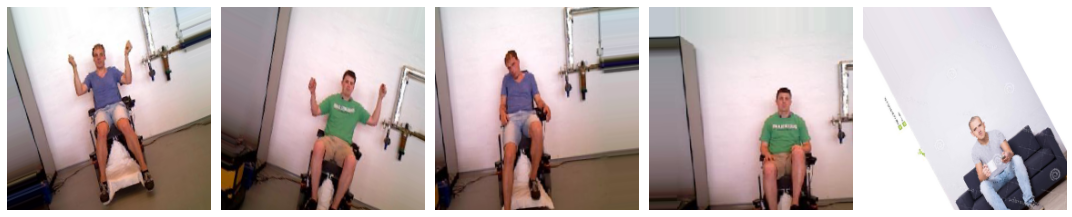

In [4]:
# Display some images from the training set
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
axes = axes.flatten()
for img, ax in zip(train_generator[0][0][:5], axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()


In [5]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                        

In [6]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    shuffle=True,
    epochs=20,
    validation_data=val_generator)

# Save the model 
model.save('/content/drive/MyDrive/HumanPostureAssessment_2.h5')


Epoch 1/20
9/9 [==============================] - 79s 9s/step - loss: 1.6688 - accuracy: 0.5135 - val_loss: 0.6834 - val_accuracy: 0.5097
Epoch 2/20
9/9 [==============================] - 67s 8s/step - loss: 1.4508 - accuracy: 0.6139 - val_loss: 0.7842 - val_accuracy: 0.5097
Epoch 3/20
9/9 [==============================] - 70s 8s/step - loss: 1.2293 - accuracy: 0.6100 - val_loss: 0.6752 - val_accuracy: 0.5676
Epoch 4/20
9/9 [==============================] - 63s 7s/step - loss: 0.9824 - accuracy: 0.5830 - val_loss: 0.6513 - val_accuracy: 0.6178
Epoch 5/20
9/9 [==============================] - 67s 8s/step - loss: 0.9323 - accuracy: 0.6062 - val_loss: 0.7235 - val_accuracy: 0.5251
Epoch 6/20
9/9 [==============================] - 67s 8s/step - loss: 0.7320 - accuracy: 0.6602 - val_loss: 0.8178 - val_accuracy: 0.4247
Epoch 7/20
9/9 [==============================] - 68s 7s/step - loss: 0.7389 - accuracy: 0.6062 - val_loss: 0.6788 - val_accuracy: 0.5483
Epoch 8/20
9/9 [==================

In [12]:
num_classes = val_generator.num_classes
# Evaluate the model on the test set
loss, accuracy = model.evaluate(val_generator)

print(f"Test loss: {loss:.3f}")
print(f"Test accuracy: {accuracy:.3f}")

9/9 [==============================] - 13s 1s/step - loss: 0.6705 - accuracy: 0.5058
Test loss: 0.671
Test accuracy: 0.506


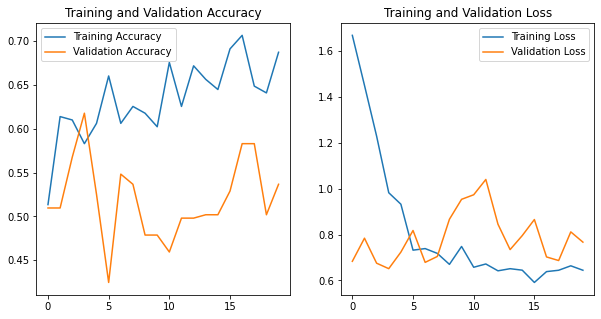

In [13]:
# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


## **Camera Test**

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the saved model
model = load_model('model.h5')

# Define the labels for the two classes
labels = {0: 'good posture', 1: 'bad posture'}

# Open the default camera (index 0)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Preprocess the image
    img = cv2.resize(frame, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Make a prediction using the model
    prediction = model.predict(img)

    # Get the predicted class label
    predicted_class = np.argmax(prediction, axis=1)[0]
    label = labels[predicted_class]

    # Draw the label on the frame
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Sitting Posture Detector', frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


error: ignored